In [17]:
import numpy as np
import pandas as pd

data = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [77]:
%%time
data1 = data.copy()
data1['ColumnA'] = data1[data1.columns[0:]].apply(lambda x: ','.join(x.dropna()), axis=1)
data_merg =  pd.DataFrame(data=data1['ColumnA'].values, columns=['ColumnA'])
data_hot_encoded = data_merg.drop('ColumnA', axis=1).join(data_merg['ColumnA'].str.get_dummies(','))

Wall time: 2.89 s


In [144]:
top10 = data_hot_encoded.sum().sort_values(ascending=False)[:10]
type(top10)

pandas.core.series.Series

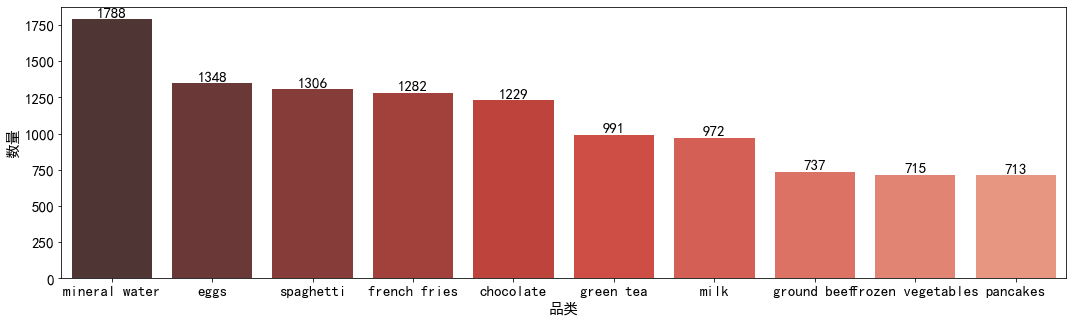

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.figure(figsize=[18,5])
top10_df = top10.to_frame().reset_index()
top10_df.columns=['品类','数量']
pal = sns.color_palette("Reds_d",len(top10_df))
rank = top10_df["数量"].argsort().argsort()
g = sns.barplot(x='品类', y='数量', data =top10_df, palette=np.array(pal[::-1])[rank], )
for index,row in top10_df.iterrows():
    g.text(index,row['数量']+15,str(row['数量']),color="black",ha="center",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('品类', fontsize=15)
plt.ylabel('数量',fontsize=15)
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# 先比较下各种写法的时间,行和列的使用会很影响性能

In [217]:
%%time
text =  ' '.join([key for i,v in  data.iteritems() for key in v.dropna().str.replace(' ','_').str.replace('&','_')])
print(len(text))

302907
Wall time: 45.9 ms


In [218]:
%%time
all_word = ' '.join(data[data.columns[0:]].apply(lambda x: ' '.join(x.dropna().str.replace(' ','_').str.replace('&','_')),axis=0))
print(len(all_word))

302907
Wall time: 53.9 ms


In [211]:
%%time
all_word = ' '.join(data[data.columns[0:]].apply(lambda x: ' '.join(x.dropna().str.replace(' ','_').str.replace('&','_')),axis=1))
print(len(all_word))

302907
Wall time: 3.83 s


In [238]:
from PIL import Image
aimask=np.array(Image.open("sun.jpg"))

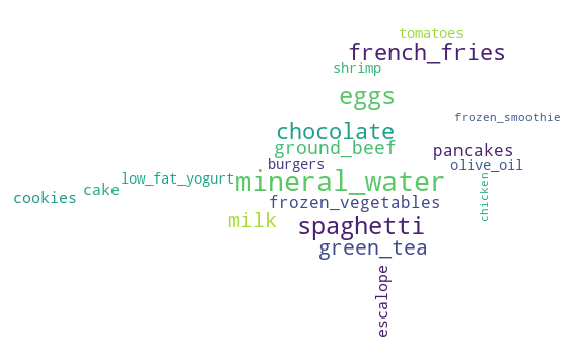

In [240]:
cut_text = word_tokenize(all_word)
#print(cut_text)
cut_text = " ".join(cut_text)
wc = WordCloud(
        max_words=20,
        width=1000,
        height=1200,
        collocations=True,
        mask=aimask,
        background_color="white",
        max_font_size=100,  # 字体最大值
        min_font_size=5, #字体最小值
        random_state=42, #随机数
        margin=2,
)
wordcloud = wc.generate(cut_text)
# 写词云图片
wordcloud.to_file("wordcloud.jpg")
# 显示词云文件
plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [220]:
process_word = WordCloud.process_text(wc, cut_text)
sorted(process_word.items(),key=lambda item:item[1],reverse=True)[0:10]

[('mineral_water', 1788),
 ('eggs', 1348),
 ('spaghetti', 1306),
 ('french_fries', 1282),
 ('chocolate', 1230),
 ('green_tea', 991),
 ('milk', 972),
 ('ground_beef', 737),
 ('frozen_vegetables', 715),
 ('pancakes', 713)]

In [ ]:
top10_df